In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load the data
df = pd.read_csv('cleandata.csv')


In [7]:
# feature creation
df['Engagement Score']=df['Total Time Spent on Website']/df['TotalVisits']
df['Engagement Score'] = df['Engagement Score'].fillna(0).astype(int)
df['Do Not Contact'] = df.apply(lambda row: 1 if row['Do Not Email'] == 1 or row['Do Not Call'] == 1 else 0, axis=1)
print(df.head())

                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0            0   
1  Organic Search             0            0          0            5   
2  Direct Traffic             0            0          1            2   
3  Direct Traffic             0            0          0            1   
4          Google             0            0          1            2   

   Total Time Spent on Website  Page Views Per Visit  ...    Lead Profile  \
0  

In [8]:
# feature bucketing
df['Total Time Spent on Website'] = pd.qcut(df['Total Time Spent on Website'], 
                                                     q=3, labels=['Low', 'Medium', 'High'],
                                                     duplicates='drop')
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].map({'Low':1,'Medium':2,'High':3})

df['Page Views Per Visit']=pd.qcut(df['Page Views Per Visit'],q=3,labels=['Low','Medium','High'])
df['Page Views Per Visit']=df['Page Views Per Visit'].map({'Low':1,'Medium':2,'High':3})

In [12]:
# feature transformaion

df['Activity Score'] = df['Asymmetrique Activity Index'].map({'Low':1,'Medium':2,'High':3})
df['Profile Score'] = df['Asymmetrique Profile Index'].map({'Low':1,'Medium':2,'High':3})

# Apply Label Encoding to categorical columns
label_enc = LabelEncoder()
df['Lead Origin']=label_enc.fit_transform(df['Lead Origin'])
df['Lead Source']=label_enc.fit_transform(df['Lead Source'])
df['Country'] = label_enc.fit_transform(df['Country'])
df['Specialization'] = label_enc.fit_transform(df['Specialization'])
df['What is your current occupation'] = label_enc.fit_transform(df['What is your current occupation'])
df['Lead Quality'] = label_enc.fit_transform(df['Lead Quality'])
df['Lead Profile']= label_enc.fit_transform(df['Lead Profile'])

In [9]:
from sklearn.preprocessing import OneHotEncoder


df['Activity Score'] = df['Asymmetrique Activity Index'].map({'Low':1,'Medium':2,'High':3})
df['Profile Score'] = df['Asymmetrique Profile Index'].map({'Low':1,'Medium':2,'High':3})
encoder = OneHotEncoder(drop=None, sparse_output=False)  # drop='first' to avoid multicollinearity

# Selecting categorical columns
cat_columns = ['Lead Origin', 'Lead Source', 'Country', 'Specialization', 
               'What is your current occupation', 'Lead Quality', 'Lead Profile']

# Applying OHE
encoded_features = encoder.fit_transform(df[cat_columns])

# Converting to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_columns))

# Dropping original categorical columns and merging new one-hot encoded features
df = df.drop(columns=cat_columns).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)


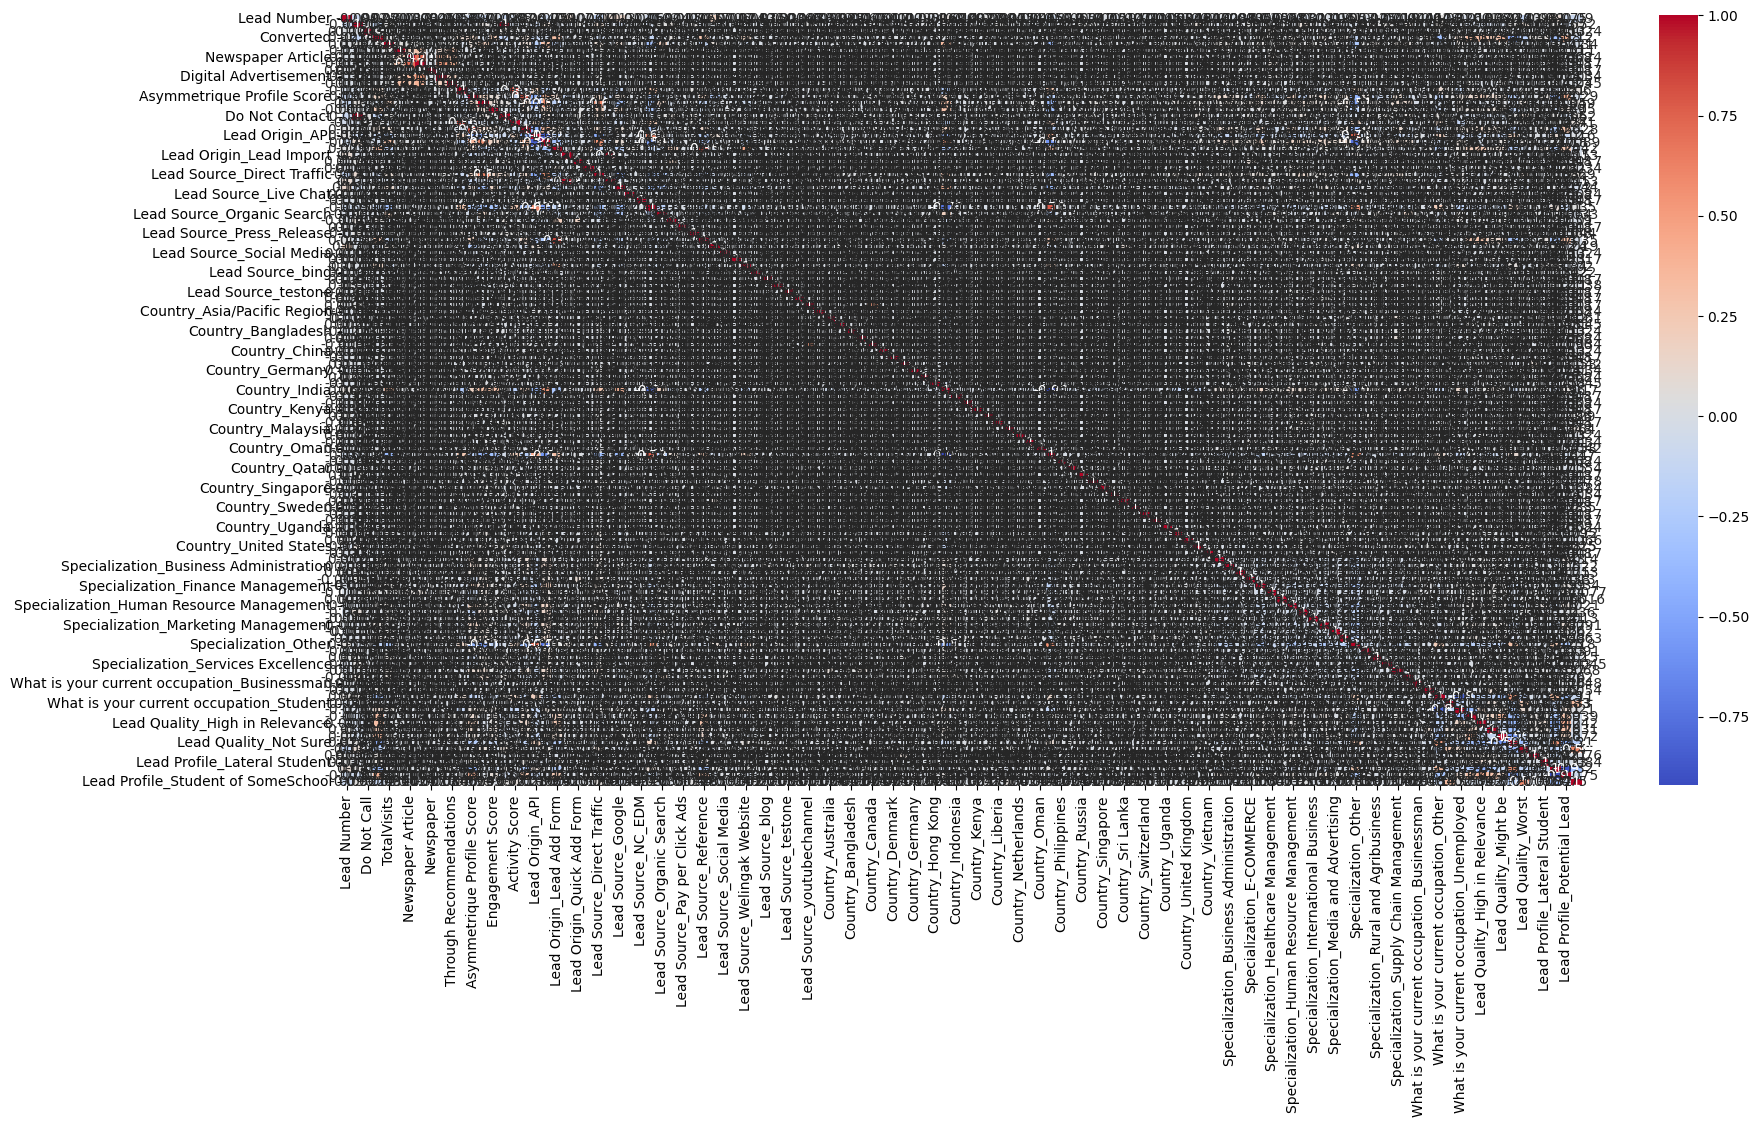

In [10]:
# feature correlation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_numerical_col=df.select_dtypes(include=[np.number])
correlation = df_numerical_col.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# feature selection
selected_features = [
    'Prospect ID', 'Do Not Contact', 'Converted', 'Engagement Score', 'Page Views Per Visit',
    'Activity Score', 'Profile Score', 'A free copy of Mastering The Interview',

    'Lead Origin_API', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
    'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',

    'Lead Source_Click2call', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 
    'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 
    'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other',
    'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference',
    'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn',
    'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 
    'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 
    'Lead Source_youtubechannel',

    'Country_Asia/Pacific Region', 'Country_Australia', 'Country_Bahrain', 
    'Country_Bangladesh', 'Country_Belgium', 'Country_Canada', 'Country_China', 
    'Country_Denmark', 'Country_France', 'Country_Germany', 'Country_Ghana', 
    'Country_Hong Kong', 'Country_India', 'Country_Indonesia', 'Country_Italy', 
    'Country_Kenya', 'Country_Kuwait', 'Country_Liberia', 'Country_Malaysia', 
    'Country_Netherlands', 'Country_Nigeria', 'Country_Oman', 'Country_Other', 
    'Country_Philippines', 'Country_Qatar', 'Country_Russia', 'Country_Saudi Arabia', 
    'Country_Singapore', 'Country_South Africa', 'Country_Sri Lanka', 'Country_Sweden', 
    'Country_Switzerland', 'Country_Tanzania', 'Country_Uganda', 
    'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_United States', 
    'Country_Vietnam',

    'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 
    'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 
    'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 
    'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 
    'Specialization_International Business', 'Specialization_Marketing Management', 
    'Specialization_Media and Advertising', 'Specialization_Operations Management', 
    'Specialization_Other', 'Specialization_Retail Management', 
    'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 
    'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism',

    'What is your current occupation_Businessman', 'What is your current occupation_Housewife',
    'What is your current occupation_Other', 'What is your current occupation_Student',
    'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional',

    'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance', 'Lead Quality_Might be', 
    'Lead Quality_Not Sure', 'Lead Quality_Worst',

    'Lead Profile_Dual Specialization Student', 'Lead Profile_Lateral Student', 
    'Lead Profile_Other Leads', 'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool'
]

df_select = df[selected_features]

In [ ]:
df_select.to_csv('selected_features.csv', index=False)

print(df_select.head())

                            Prospect ID  Do Not Contact  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620               0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482               0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a               0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc               0          0   
4  3256f628-e534-4826-9d63-4a8b88782852               0          1   

   Engagement Score Page Views Per Visit  Activity Score  Profile Score  \
0                 0                    1               2              2   
1               134                    2               2              2   
2               766                    2               2              3   
3               305                    1               2              3   
4               714                    1               2              3   

   A free copy of Mastering The Interview  Lead Origin_API  \
0                                       0              1.0   
1   